In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [1]:
df = pd.read_csv('FAOSTAT_data_1-10-2022.csv') ### create temperatue data frame

In [ ]:
df.iloc[100827 :100900 ]

#df.info()

df.isna().sum()




df['Unit'].value_counts()## all the vales are the same
df['Element'].value_counts()#all the the values are the same
df['Element Code'].value_counts()## all the values are the same
df['Domain'].value_counts()## all the Values are the same
df['Domain Code'].value_counts()## all the Values are the same

df['Months'].value_counts() ### very different values

df['Flag Description'].value_counts() ## Two Values the same as
 ## Flag --> 7913 : NV --> Flag Des. --> Data not available
df['Flag'].value_counts()## two vales Fc and NV

## df['Value'] --> 7913 missing values

In [ ]:
(df['Year'] - df['Year Code'] != 0).sum() ### both columns are the same

In [ ]:
df['Months Code'].info()## Months Code is int / Months is str

In [ ]:
df_NV =  df[df['Flag']== 'NV'] ## new Data Frame where the values are NAN -->  Flag == NV

df_NV['Area'].value_counts().tail(25) ## there are 63 Area where Value is NAN

df_NV

In [ ]:
df.Months.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec?Jan?Feb', 'Mar?Apr?May', 'Jun?Jul?Aug', 'Sep?Oct?Nov',
       'Meteorological year'], dtype=object)

In [ ]:
df.groupby('Area').agg({'Value' : 'max'})

,Value
Area,
Afghanistan,4.803
Albania,4.807
Algeria,4.297
American Samoa,2.395
Andorra,5.576
...,...
Western Sahara,4.522
Yemen,2.535
Yugoslav SFR,4.722


In [ ]:
(df.Area.value_counts() != 1020).sum()

In [ ]:
(df.Area.value_counts() != 1020).sum()

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df_co2 = pd.read_csv('co2-gdp-pop-growth.csv') ## create CO2 data frame

In [ ]:
df_co2.head()

In [ ]:
df_co2['Year'].max()

In [ ]:
df['Year'].max()

In [ ]:
## drop columns we don't need -> ['Domain Code' ,'Domain' , 'Element Code' , 'Element' ,'Unit']

df_temp = df.drop(columns =['Domain Code' ,'Domain' , 'Element Code' , 'Element' ,'Unit'], axis = 1)

In [ ]:
##  create a Data Frame with only the years --> from Months column ==  Meteorological year
## we do that , because we want to merge it  with CO2 data set

df_temp_year =  df_temp[df_temp['Months']== 'Meteorological year']

In [ ]:
df_temp_year.head()

In [ ]:
## merge temprture data with co2 data on --> countries and years

df_temp_co2 = pd.merge(left=df_temp_year, right = df_co2, right_on=['Year' ,'Entity' ], left_on=['Year' , 'Area'])

In [ ]:
df_temp_co2.head()

,Area Code (FAO),Area,Months Code,Months,Year Code,Year,Value,Flag,Flag Description,Entity,Code,Population growth (annual %),GDP growth (annual %),Annual CO₂ emissions growth (%)
0,2,Afghanistan,7020,Meteorological year,1961,1961,-0.121,Fc,Calculated data,Afghanistan,AFG,1.925952,NaN,18.583180
1,2,Afghanistan,7020,Meteorological year,1962,1962,-0.171,Fc,Calculated data,Afghanistan,AFG,2.014879,NaN,40.300896
2,2,Afghanistan,7020,Meteorological year,1963,1963,0.841,Fc,Calculated data,Afghanistan,AFG,2.078997,NaN,2.634644
3,2,Afghanistan,7020,Meteorological year,1964,1964,-0.779,Fc,Calculated data,Afghanistan,AFG,2.139651,NaN,18.651236
4,2,Afghanistan,7020,Meteorological year,1965,1965,-0.254,Fc,Calculated data,Afghanistan,AFG,2.216007,NaN,20.078205


In [ ]:
df_temp_co2.isna().sum()

,0
Area Code (FAO),0
Area,0
Months Code,0
Months,0
Year Code,0
Year,0
Value,291
Flag,0
Flag Description,0
Entity,0


In [ ]:
### we see --> is there a diffrence between countries columns ['Entity'] and ['Area']
(df_temp_co2['Entity'] != df_temp_co2['Area']).sum()

### there is no differnce --> we can delete one of them

0

In [ ]:
## we can drop the columns --> we don't need
df_temp_co2 = df_temp_co2.drop(columns = ['Months Code' , 'Months' ,'Year Code' ,'Flag Description'  , 'Entity', 'Code'] , axis=1)

## the two columns --> Flag and Flag Description == each one has two values , have same meaning
### so we drop 'Flag Description'
## Flag --> Fc : meaning there is a value  , NV : meaning Missing Value

In [ ]:
df_temp_co2

,Area Code (FAO),Area,Year,Value,Flag,Population growth (annual %),GDP growth (annual %),Annual CO₂ emissions growth (%)
0,2,Afghanistan,1961,-0.121,Fc,1.925952,NaN,18.583180
1,2,Afghanistan,1962,-0.171,Fc,2.014879,NaN,40.300896
2,2,Afghanistan,1963,0.841,Fc,2.078997,NaN,2.634644
3,2,Afghanistan,1964,-0.779,Fc,2.139651,NaN,18.651236
4,2,Afghanistan,1965,-0.254,Fc,2.216007,NaN,20.078205
...,...,...,...,...,...,...,...,...
10604,181,Zimbabwe,2016,1.470,Fc,2.081806,0.900955,-14.047390
10605,181,Zimbabwe,2017,0.443,Fc,2.043620,4.080264,-11.751360
10606,181,Zimbabwe,2018,0.747,Fc,2.020537,5.009867,15.264904
10607,181,Zimbabwe,2019,1.359,Fc,1.989253,-6.332447,-8.765334


In [ ]:
df_NV =  df_temp_co2[df_temp_co2['Flag'] != 'Fc'] ### df_temp_co2 : Flag == 'NV'

df_NV['Area'].unique()

array(['American Samoa', 'Antigua and Barbuda', 'Aruba', 'Burundi',
       'Cayman Islands', 'Christmas Island', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Djibouti', 'Equatorial Guinea',
       'Eritrea', 'Jamaica', 'Kiribati', 'Maldives', 'Montserrat',
       'Nauru', 'Niue', 'Palau', 'Panama', 'Rwanda',
       'Saint Kitts and Nevis', 'Samoa', 'Sao Tome and Principe',
       'Sierra Leone', 'Solomon Islands', 'Turks and Caicos Islands',
       'Yemen'], dtype=object)

In [ ]:
df_temp_co2['Area'].value_counts() ## there are 196 countries --> the whole world

In [ ]:
europe = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina",
    "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia",
    "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein",
    "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia",
    "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia",
    "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom", "Vatican City"
]

In [ ]:
asian_countries = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia",
    "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Japan", "Jordan",
    "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia",
    "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar",
    "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", "Taiwan", "Tajikistan",
    "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan",
    "Vietnam", "Yemen"
]


In [ ]:
north_american_countries = [
    "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba",
    "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Haiti",
    "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis",
    "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States"
]


In [ ]:
south_american_countries = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana",
    "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"
]


In [ ]:
australia_oceania_countries = [
    "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru",
    "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands",
    "Tonga", "Tuvalu", "Vanuatu"
]


In [ ]:
africa = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon",
    "Central African Republic", "Chad", "Comoros", "Democratic Republic of the Congo", "Djibouti",
    "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana",
    "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar",
    "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger",
    "Nigeria", "Republic of the Congo", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles",
    "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia",
    "Uganda", "Zambia", "Zimbabwe"
]


In [ ]:
africa_df =  df_temp_co2[df_temp_co2['Area'].isin(africa)] ### Africa countries

asia_df = df_temp_co2[df_temp_co2['Area'].isin(asian_countries)] ### Asian countries

europe_df =  df_temp_co2[df_temp_co2['Area'].isin(europe)] ### Europe countries

north_american_df =  df_temp_co2[df_temp_co2['Area'].isin(north_american_countries)] ### North American countries

south_american_df =  df_temp_co2[df_temp_co2['Area'].isin(south_american_countries)] ### South American countries

australia_df =  df_temp_co2[df_temp_co2['Area'].isin(australia_oceania_countries)] ### Australia and Oceania countries

## **The test statistic and P-value**



In [ ]:
!pip install scipy

In [ ]:
df_temp_co2_Fc = df_temp_co2[df_temp_co2['Flag']=='Fc'] ### drop missing values

In [ ]:
df_temp_co2_Fc.isna().sum()

df_temp_co2_Fc = df_temp_co2_Fc[df_temp_co2_Fc['Year'] > 1980] ### Tempreture change after 1980

In [ ]:
from scipy.stats import ttest_1samp

# H0 : There is no significant change in temperature compared to the baseline period .
# H1 : There is a significant temperature change compared to the baseline period .


print(ttest_1samp( popmean=0,  a =  df_temp_co2_Fc['Value'] ))

print("Pvalue < 0.05 --> Reject the null hypothesis: Significant temperature change detected.")

TtestResult(statistic=101.7345657816801, pvalue=0.0, df=7125)
Pvalue < 0.05 --> Reject the null hypothesis: Significant temperature change detected.


**Conclusion:**

Based on the t-test, the temperature change after 1980 is significantly different from 0°C (the baseline). This means that the temperature change after 1980 is not just random noise; it's a statistically significant deviation from the baseline, and the temperature has likely increased or decreased in a measurable way when compared to the baseline period (1951–1980).

# Line plot for the Temperature by Continents

<ipython-input-26-224bdd59fdd2>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Value', data=asia_df,  color='blue',ci=None)
<ipython-input-26-224bdd59fdd2>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Value', data=africa_df,  color='red',ci=None)
<ipython-input-26-224bdd59fdd2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Value', data=europe_df,  color='green',ci=None)
<ipython-input-26-224bdd59fdd2>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Value', data=north_american_df,  color='orange' , ci=None)
<ipython-input-26-224bdd59fdd2>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Value', data=south_ame

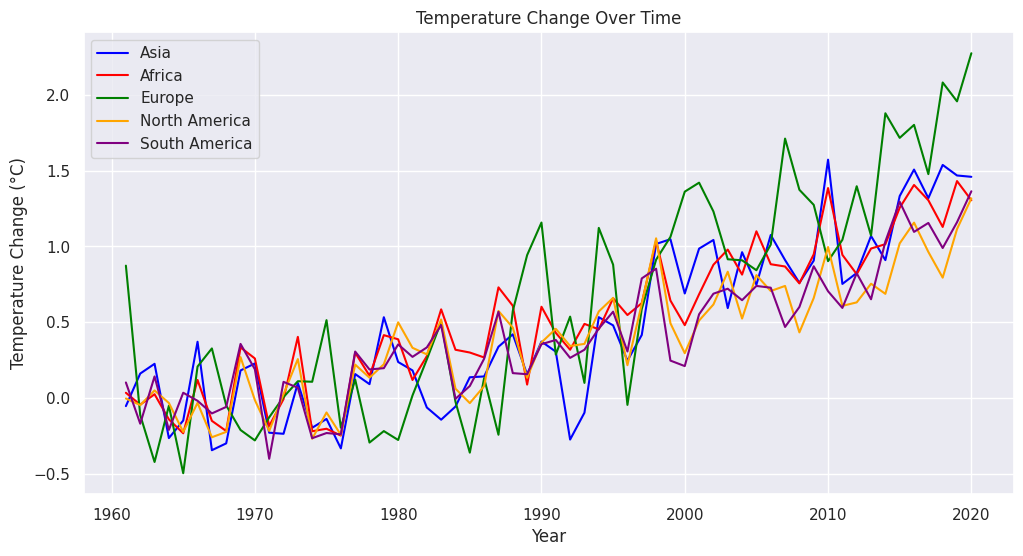

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', data=asia_df,  color='blue',ci=None)
sns.lineplot(x='Year', y='Value', data=africa_df,  color='red',ci=None)
sns.lineplot(x='Year', y='Value', data=europe_df,  color='green',ci=None)
sns.lineplot(x='Year', y='Value', data=north_american_df,  color='orange' , ci=None)
sns.lineplot(x='Year', y='Value', data=south_american_df,  color='purple' , ci=None)
#sns.lineplot(x='Year', y='Value', data=australia_df, color='gray',ci=None )

plt.title('Temperature Change Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend(['Asia', 'Africa', 'Europe', 'North America', 'South America', 'Australia and Oceania'])
plt.grid(True)
plt.show()


This gives us more certainty that temperature anomaly increased over the years .

 It seems also Europe and Asia the most affected continents


# Heatmap of correlation

<Axes: >

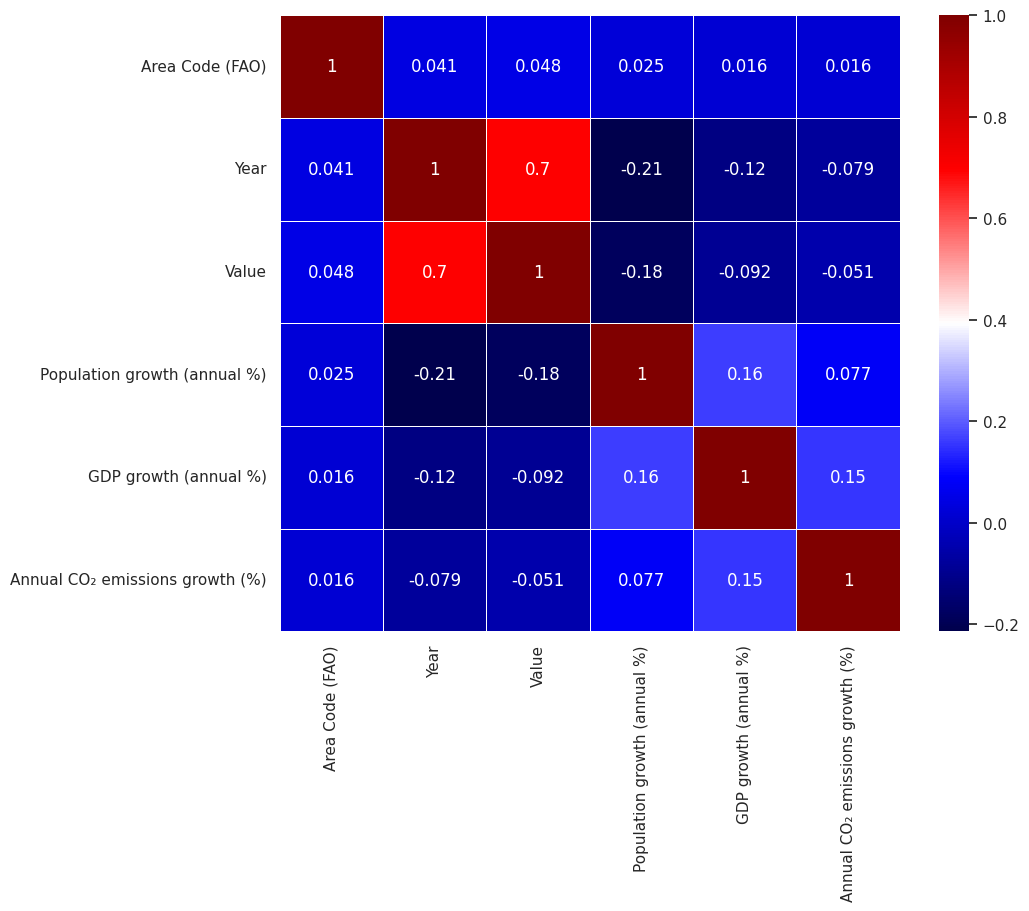

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create  a data frame without object columns

corr_df =  df_temp_co2.select_dtypes(exclude = 'object')

## create a corr matrics

corr_matrix = corr_df.corr()

# Create a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap = 'seismic' , linewidths=0.5)

**Conclusion :**

There is a strong posotive relation bweteen the temperature change and time.

Temperature change has  generally increased over time.

# Boxplot for Temperature anomaly and stats indicater

<ipython-input-28-71552722f39a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Value", data=df_temp_co2, palette="coolwarm")


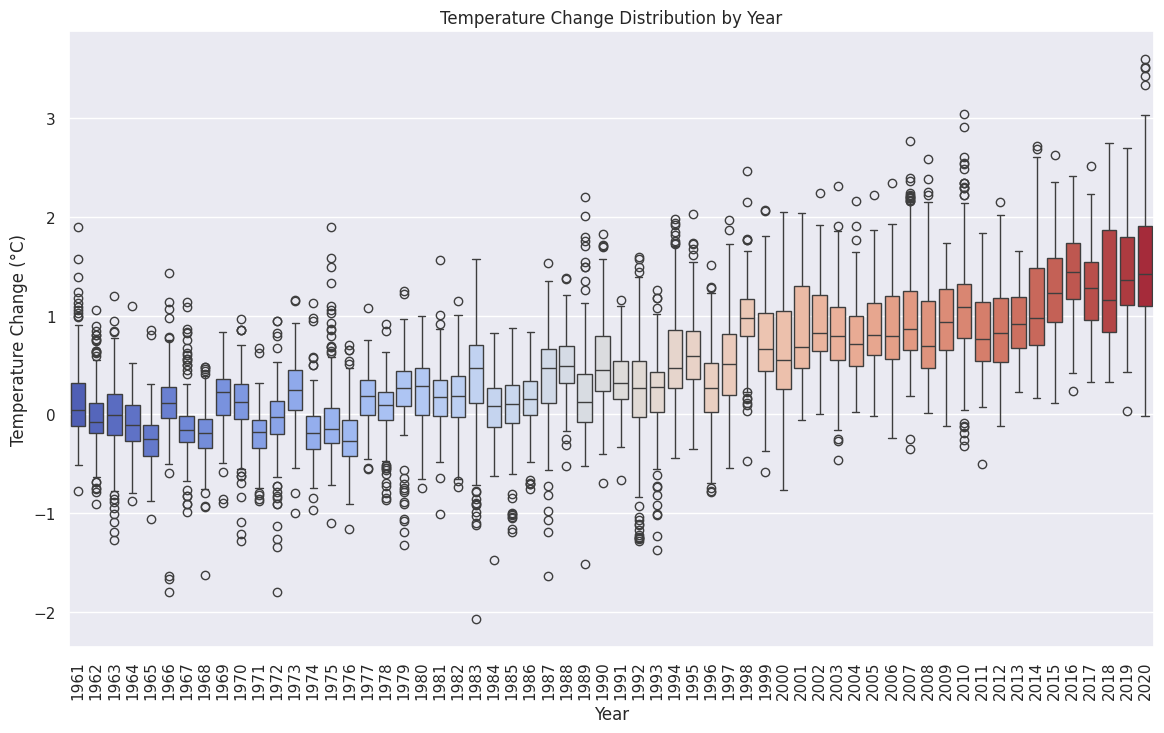

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Year", y="Value", data=df_temp_co2, palette="coolwarm")

plt.title("Temperature Change Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")

plt.xticks(rotation=90)
plt.show()

The average temperature anomaly  over the years was changing by 0.51 C°  .


 The most of years   precisely 75% was the temperature anomaly by 0.91 C° .
1983 and 2020 have outliers negative and positive respectfully


In [ ]:
df_temp_co2['Value'].describe()

# Anomaly temperature in summer and winter after biased line period

In [ ]:
summer_df =df_temp[df_temp['Months']=='Jun?Jul?Aug']
winter_df= df_temp[df_temp['Months']=='Dec?Jan?Feb']



min_winter_df = winter_df[winter_df['Year'] > 1980].sort_values(by='Value', ascending=True )
max_winter_df = winter_df[winter_df['Year'] > 1980].sort_values(by='Value', ascending=False )
min_summer_df =  summer_df[summer_df['Year'] > 1980].sort_values(by='Value', ascending=True)
max_summer_df =  summer_df[summer_df['Year'] > 1980].sort_values(by='Value', ascending=False)

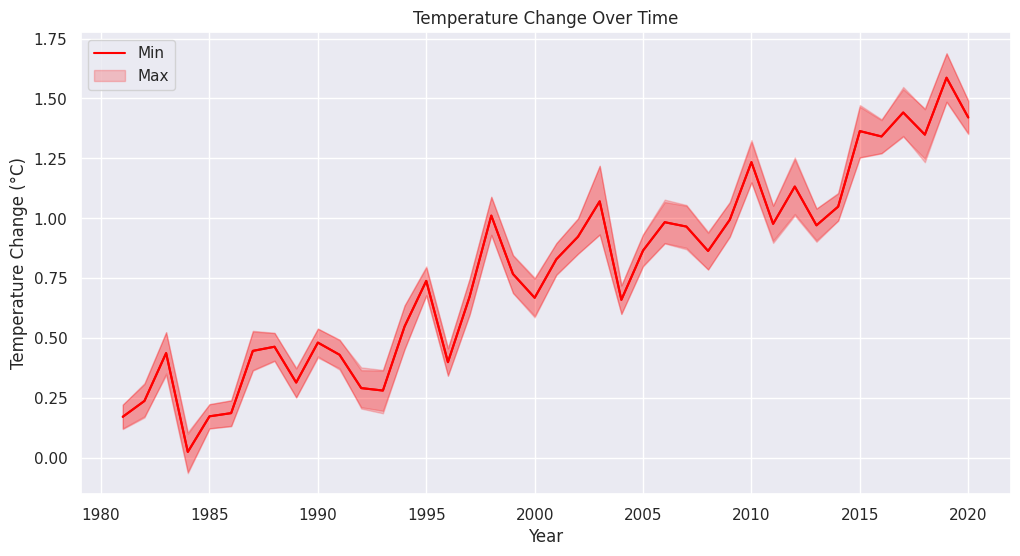

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))

sns.lineplot(x='Year', y='Value', data=min_summer_df,  color='red')

sns.lineplot(x='Year', y='Value', data=max_summer_df,  color='red')
plt.title('Temperature Change Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend(['Min', 'Max'])
plt.grid(True)

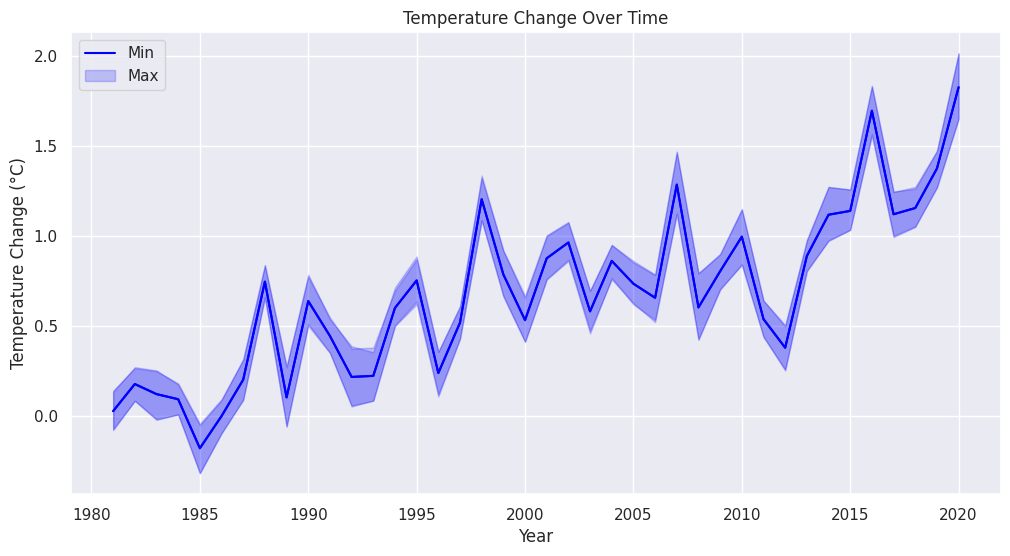

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))

sns.lineplot(x='Year', y='Value', data=min_winter_df,  color='blue')

sns.lineplot(x='Year', y='Value', data=max_winter_df,  color='blue')
plt.title('Temperature Change Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend(['Min', 'Max'])
plt.grid(True)

# CO2 Categories

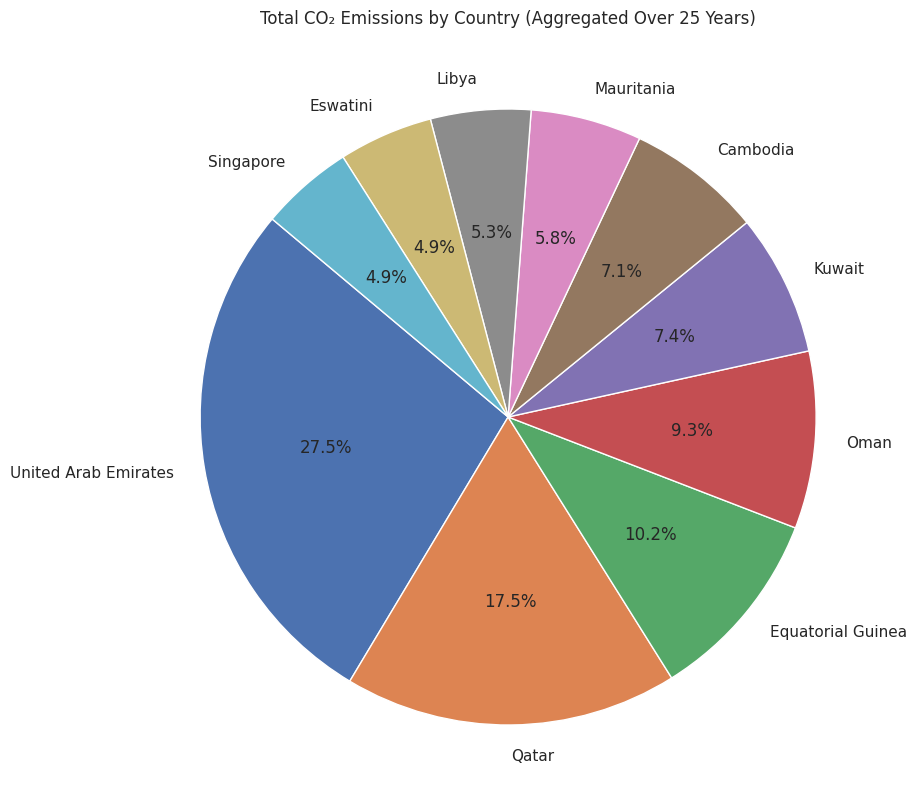

In [ ]:
df_temp_co2.describe()


# Assume df is your DataFrame with 'Country' and 'CO2Emissions' columns
# Aggregating CO2 emissions by country
total_emissions = df_temp_co2['Annual CO₂ emissions growth (%)'].dropna()
total_emissions = df_temp_co2['Annual CO₂ emissions growth (%)'] > 2
total_emissions = df_temp_co2.groupby('Area')['Annual CO₂ emissions growth (%)'].sum()
total_emissions = total_emissions.sort_values(ascending=False).head(10)

total_emissions = total_emissions[total_emissions > 1e-5]  # Adjust threshold as needed




# Define a custom autopct function to skip very small percentages
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 0.5 else ''  # Display only if percentage > 0.5%

# Creating the pie chart
plt.figure(figsize=(10, 10))
plt.pie(total_emissions, labels= total_emissions.index, autopct=custom_autopct, startangle=140)
plt.title("Total CO₂ Emissions by Country (Aggregated Over 25 Years)")
plt.show()


